In [3]:
 !head -n 10 /home/kirti/Desktop/yob1880.txt

In [4]:
import pandas as pd
names1880=pd.read_csv('/home/kirti/Desktop/yob1880.txt' ,names=['names','sex','births'])
names1880[:10]

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
names1880.groupby('sex').sum()

,births
sex,
F,90994
M,110490


In [6]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']
for year in years:
    path='/home/kirti/Desktop/yob%d.txt'%year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True)   
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692107,Zymaire,M,5,2010
1692108,Zyonne,M,5,2010
1692109,Zyquarius,M,5,2010
1692110,Zyran,M,5,2010


In [7]:
total_births=names.pivot_table('births', index='year' ,columns='sex' ,aggfunc=sum)
total_births[:10]

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110785
1887,145981,101412
1888,178622,120851


In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

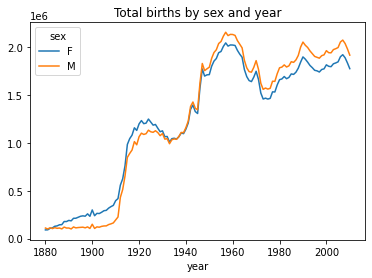

In [9]:
 total_births.plot(title='Total births by sex and year')

In [10]:
def add_prop(group):
 # Integer division floors
 births = group.births.astype(float)
 group['prop'] = births / births.sum()
 return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692107,Zymaire,M,5,2010,0.000003
1692108,Zyonne,M,5,2010,0.000003
1692109,Zyquarius,M,5,2010,0.000003
1692110,Zyran,M,5,2010,0.000003


In [11]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [12]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
 pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [13]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [14]:
total_births=top1000.pivot_table('births', index='year', columns='name' ,aggfunc=sum)


In [15]:
subsets=total_births[['John', 'Harry','Mary','Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

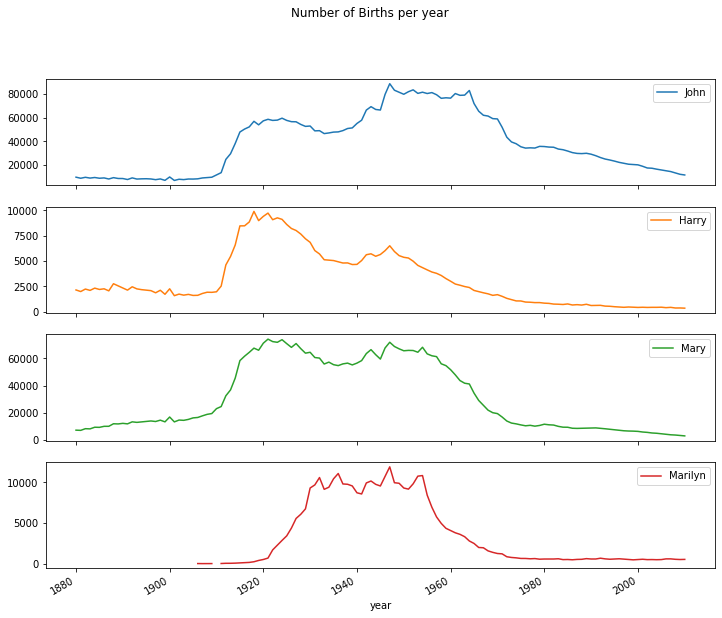

In [16]:
subsets.plot(subplots=True, figsize=(12,10), grid=False ,title="Number of Births per year")

In [17]:
table=top1000.pivot_table('prop' ,index='year' , columns='sex' , aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

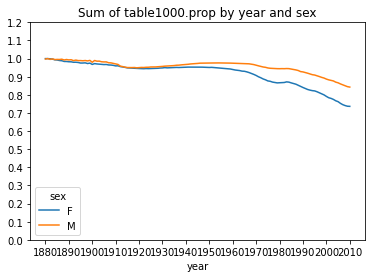

In [18]:
table.plot(title='Sum of table1000.prop by year and sex' , yticks=np.linspace(0,1.2,13) ,xticks=range(1880,2011,10))

In [19]:
df=boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22127,2010,0.011546
260878,Ethan,M,18002,2010,0.009393
260879,Michael,M,17350,2010,0.009053
260880,Jayden,M,17179,2010,0.008964
260881,William,M,17051,2010,0.008897
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [20]:
prop_cumsum=df.sort_values(by='prop',ascending=False ).prop.cumsum()
prop_cumsum[:10]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [21]:
prop_cumsum.searchsorted(0.5)

116

In [22]:
df=boys[boys.year==1900]
in1900=df.sort_values(by='prop' ,ascending=False).prop.cumsum()
in1900[:10]

40877    0.065318
40878    0.122329
40879    0.170474
40880    0.206380
40881    0.233612
40882    0.259005
40883    0.283686
40884    0.306792
40885    0.324867
40886    0.342185
Name: prop, dtype: float64

In [23]:
in1900.searchsorted(0.5)+1

25

In [24]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1


In [25]:
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')

In [26]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

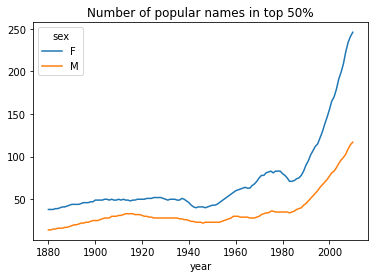

In [27]:
diversity.plot(title="Number of popular names in top 50%")

In [28]:
get_lastletter=lambda x: x[-1]
last_letters=names.name.map(get_lastletter)
last_letters.name='last letter'


In [29]:
table=names.pivot_table('births' , index=last_letters, columns=['sex','year'], aggfunc=sum)

In [30]:
sutable=table.reindex(columns=[1910,1960,2010],level='year' )
sutable[:10]

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0
f                 NaN      20.0      97.0    152.0    9230.0    2312.0
g                57.0     318.0     669.0    439.0   20230.0    2696.0
h             20432.0   73241.0  134877.0   8849.0   80840.0   99303.0
i               605.0   80814.0   56276.0    164.0    1295.0   43447.0
j                 NaN       NaN     165.0      NaN       NaN    1479.0

In [31]:
sutable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [32]:
letter_prop=sutable/sutable.sum().astype(float)

In [33]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Female'}, xlabel='last letter'>

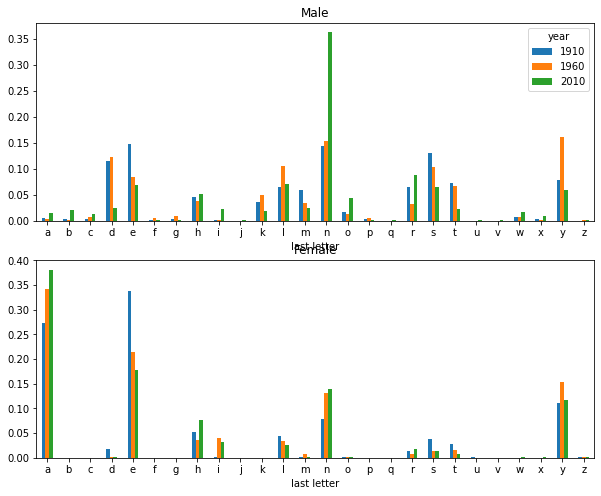

In [34]:
fig,axes=plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0, ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [39]:
letter_prop=table/table.sum().astype(float)

In [40]:
dny_ts=letter_prop.loc[['d','n','y'], 'M'].T

In [43]:
dny_ts.head()

last letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

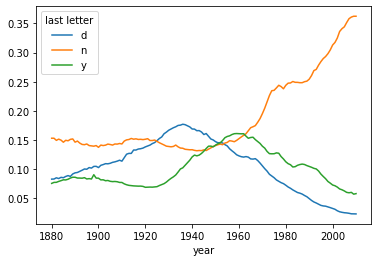

In [44]:
dny_ts.plot()

In [48]:
all_names=top1000.name.unique()
mask=np.array(['lesl' in x.lower() for x in all_names])
lesley_like=all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [50]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    370568
Lesly      10072
Name: births, dtype: int64

In [52]:
table=filtered.pivot_table('births' ,index='year' ,columns='sex' ,aggfunc=sum)

In [55]:
table=table.div(table.sum(1),axis=0)

In [56]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

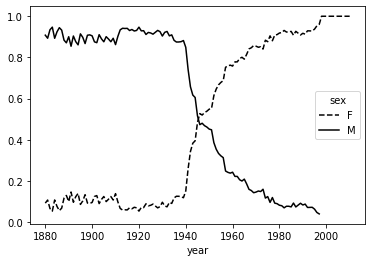

In [57]:
table.plot(style={'M': 'k-' , 'F':'k--'})